In [130]:
# Dependencies and Setup

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import time
import scipy.stats as st
from scipy.stats import linregress

In [131]:
# Output File (CSV)
pyre_data_path = "Resources/california_fire_cleaned.csv"

In [132]:
pyre_data = pd.read_csv(pyre_data_path)
pyre_data.head()

,Counties,AcresBurned,AirTankers,ArchiveYear,CountyIds,CrewsInvolved,Dozers,Engines,Extinguished,Fatalities,...,AvgEngines,AvgFatalities,AvgHelicopters,AvgInjuries,AvgPersonnelInvolved,AvgStructuresDamaged,AvgStructuresDestroyed,AvgStructuresEvacuated,AvgStructuresThreatened,AvgWaterTenders
0,Alameda,240.0,NaN,2013.0,1,NaN,NaN,NaN,2013-06-08T13:25:00Z,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Alameda,150.0,NaN,2013.0,1,NaN,NaN,NaN,2013-10-04T10:30:00Z,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Alameda,50.0,NaN,2013.0,1,NaN,NaN,NaN,2013-07-04T11:30:00Z,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Alameda,38.0,NaN,2013.0,1,NaN,NaN,NaN,2013-07-06T14:30:00Z,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Alameda,2700.0,NaN,2015.0,1,NaN,NaN,5.0,2015-08-22T18:30:00Z,NaN,...,5.0,NaN,NaN,NaN,18.0,NaN,NaN,NaN,NaN,1.0


In [133]:
counties = pyre_df["Counties"].value_counts()
counties

Riverside          146
San Diego           89
Butte               66
San Luis Obispo     64
Shasta              64
Kern                62
Siskiyou            57
Fresno              57
San Bernardino      53
Tehama              51
Lake                49
Los Angeles         46
Monterey            45
Santa Clara         39
El Dorado           37
Madera              36
Lassen              36
Mariposa            35
Tulare              35
Alameda             32
Modoc               31
Ventura             30
Santa Barbara       29
Mendocino           28
Contra Costa        27
Napa                25
Humboldt            25
Calaveras           22
Tuolumne            22
Trinity             21
San Benito          20
Stanislaus          20
Solano              19
Sonoma              18
Placer              17
Nevada              17
Merced              16
Yuba                14
Amador              13
Inyo                12
Yolo                12
Plumas              11
Sacramento          11
Orange     

In [134]:
unique_id = pyre_df["UniqueId"].value_counts()
unique_id.head(30)

5ce45b6c-81b5-422c-9078-8c68dd872c8a    4
90b0daf7-5d84-42d9-bb35-bb78d4faf950    4
af30fe23-6cfd-4fd6-b2d9-91648eeae814    3
be79d28c-767d-4a0d-b168-e86a5842004f    2
94a7ae52-fed9-4997-b972-1761aa4b89ca    2
7ed61f45-7e2b-449b-8ead-d34b75a5e818    2
d28bc34e-73a8-454d-9e55-dea7bdd40bee    2
808c34bb-4e64-4eb5-9c3e-2a1e58195074    2
23cbd274-ded3-43ea-9174-b5615eac3244    2
676946dc-1b38-4a09-9bbe-9ce638cfed52    2
2437bb57-1d09-4892-8c26-a60661dae1d9    2
b604ffa7-8cee-4724-bb82-f1f4553a192f    2
4630e9ce-88ec-4159-9bc9-25ff5f8216cc    2
e0d038e9-0926-4c05-8317-ec7075a04b12    2
97ff14e8-6d08-4214-ad3b-847fa3a0e84a    2
4d07ccc3-32be-4a1d-acac-18333884c97d    2
207f72f7-1453-40dc-919e-3551f7041b22    2
a21faf4f-3628-4e24-ac64-8471d9d12560    2
82c2aafa-ef04-49f0-a172-0dfa8a15582e    2
240b1f55-0f4e-448d-a4ce-3ecfec7a6c9d    2
ba818380-4001-46a2-ac04-d5f322cdf3b9    2
92d7aeea-7abf-47a4-bf76-a4fe0fac65c6    2
f87005f7-c31b-4135-989a-ee5611626b3c    1
e5122d1e-2bfc-4fa6-8152-da309e02c0

In [135]:
pyre_df = pyre_df.set_index('Name')
pyre_df.head()

,AcresBurned,AirTankers,ArchiveYear,Counties,CountyIds,CrewsInvolved,Dozers,Engines,Extinguished,Days Burned,...,Location,MajorIncident,PersonnelInvolved,Started,StructuresDamaged,StructuresDestroyed,StructuresEvacuated,StructuresThreatened,UniqueId,WaterTenders
Name,,,,,,,,,,,,,,,,,,,,,
Rim Fire,257314.0,NaN,2013,Tuolumne,55,NaN,NaN,NaN,9/6/13,20,...,3 miles east of Groveland along Hwy 120,False,NaN,8/17/13,NaN,NaN,NaN,NaN,5fb18d4d-213f-4d83-a179-daaf11939e78,NaN
Powerhouse Fire,30274.0,NaN,2013,Los Angeles,19,NaN,NaN,NaN,6/8/13,9,...,Angeles National Forest,False,NaN,5/30/13,NaN,NaN,NaN,NaN,bf37805e-1cc2-4208-9972-753e47874c87,NaN
Mountain Fire,27531.0,NaN,2013,Riverside,33,NaN,NaN,NaN,7/30/13,15,...,Hwy 243 & Hwy 74 near Mountain Center,False,NaN,7/15/13,NaN,NaN,NaN,NaN,a3149fec-4d48-427c-8b2c-59e8b79d59db,NaN
American Fire,27440.0,NaN,2013,Placer,31,NaN,NaN,NaN,8/30/13,20,...,"Deadwood Ridge, northeast of Foresthill",False,NaN,8/10/13,NaN,NaN,NaN,NaN,8213f5c7-34fa-403b-a4bc-da2ace6e6625,NaN
Springs Fire,24251.0,NaN,2013,Ventura,56,47.0,8.0,117.0,5/11/13,9,...,Southbound Highway 101 at Camarillo Springs Ro...,True,2167.0,5/2/13,6.0,10.0,NaN,NaN,46731fb8-3350-4920-bdf7-910ac0eb715c,11.0


In [136]:
unique_id2 = pyre_df.groupby(["UniqueId"]).count()
unique_id2

,AcresBurned,AirTankers,ArchiveYear,Counties,CountyIds,CrewsInvolved,Dozers,Engines,Extinguished,Days Burned,...,Latitude,Location,MajorIncident,PersonnelInvolved,Started,StructuresDamaged,StructuresDestroyed,StructuresEvacuated,StructuresThreatened,WaterTenders
UniqueId,,,,,,,,,,,,,,,,,,,,,
00089805-cdee-4607-8b67-1653bee463bc,1,0,1,1,1,1,0,1,1,1,...,1,1,1,1,1,0,0,0,0,1
0011ce0f-5493-4bef-b6e1-4674a0393b0c,1,0,1,1,1,0,0,0,1,1,...,1,1,1,0,1,0,0,0,0,0
0089929d-0b52-46fe-8982-b096b7616f30,1,0,1,1,1,0,0,0,1,1,...,1,1,1,0,1,0,0,0,0,0
0089d3c4-c554-46e1-8eb9-af95e4dfae0c,1,0,1,1,1,0,0,0,1,1,...,1,1,1,0,1,0,0,0,0,0
00a13d84-415e-4106-aa31-2e664ed9eabf,1,0,1,1,1,0,0,0,1,1,...,1,1,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ff8701f0-a12a-4b40-baa9-b58c4e2e31f3,1,0,1,1,1,0,0,0,1,1,...,1,1,1,0,1,0,0,0,0,0
ffb3293b-3349-49c5-a7cb-c488391e8a72,1,0,1,1,1,0,0,0,1,1,...,1,1,1,0,1,0,0,0,0,0
ffb57bcc-80f7-4299-bfcf-c9be3b66d5ff,1,0,1,1,1,0,0,0,1,1,...,1,1,1,0,1,0,0,0,0,0


In [137]:
major = pyre_df.loc[pyre_df["MajorIncident"]==True]
major.head()

major["MajorIncident"].count()

383

In [138]:
major.count()

AcresBurned             383
AirTankers               26
ArchiveYear             383
Counties                383
CountyIds               383
CrewsInvolved           167
Dozers                  119
Engines                 185
Extinguished            378
Days Burned             383
Fatalities               21
Helicopters              83
Injuries                119
Latitude                383
Location                383
MajorIncident           383
PersonnelInvolved       191
Started                 383
StructuresDamaged        66
StructuresDestroyed     160
StructuresEvacuated       0
StructuresThreatened     30
UniqueId                383
WaterTenders            141
dtype: int64

In [139]:
years = pyre_df.groupby(["ArchiveYear"]).count()["UniqueId"]
years

ArchiveYear
2013    162
2014    117
2015    152
2016    185
2017    438
2018    316
2019    266
Name: UniqueId, dtype: int64

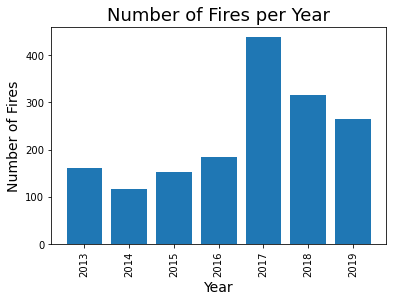

In [140]:
plt.bar(years.index.values, years.values)

plt.xlabel("Year", fontsize=14)
plt.ylabel("Number of Fires", fontsize=14)
plt.title("Number of Fires per Year", fontsize=18)

plt.xticks(rotation=90)
plt.tick_params(axis='x', which='major', labelsize=10)

plt.show()

In [141]:
years_major = major.groupby(["ArchiveYear"]).count()["UniqueId"]
years_major

ArchiveYear
2013    45
2014    40
2015    52
2016    50
2017    93
2018    74
2019    29
Name: UniqueId, dtype: int64

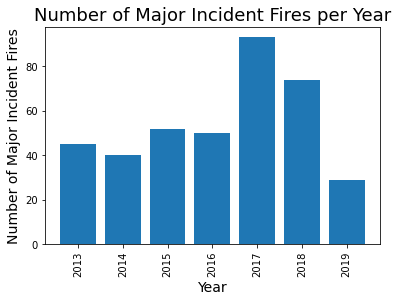

In [142]:
plt.bar(years_major.index.values, years_major.values)

plt.xlabel("Year", fontsize=14)
plt.ylabel("Number of Major Incident Fires", fontsize=14)
plt.title("Number of Major Incident Fires per Year", fontsize=18)

plt.xticks(rotation=90)
plt.tick_params(axis='x', which='major', labelsize=10)

plt.show()

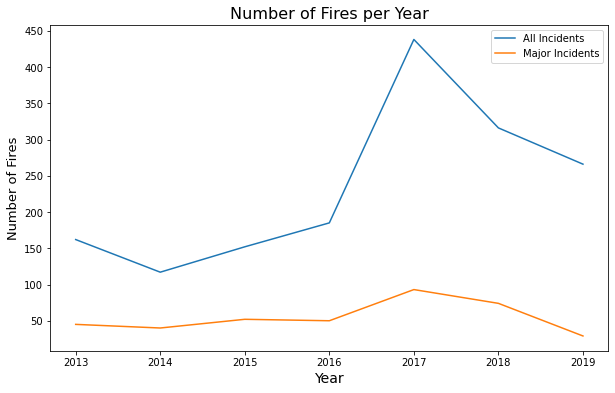

In [249]:
fig, ax=plt.subplots(figsize=(10,6))
ax.plot(years.index.values, years.values)
ax.plot(years_major.index.values, years_major.values)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Number of Fires", fontsize=13)
plt.title("Number of Fires per Year", fontsize=16)


ax.legend(["All Incidents", "Major Incidents"])
plt.show()

In [143]:
sample = pd.DataFrame({"Number of Fires per Year": years})
sample

,Number of Fires per Year
ArchiveYear,
2013,162
2014,117
2015,152
2016,185
2017,438
2018,316
2019,266


In [144]:
years_acres = pyre_df.groupby(["ArchiveYear"]).sum()["AcresBurned"]
years_acres

ArchiveYear
2013     527745.0
2014     448715.0
2015     574503.0
2016     505927.0
2017    1793915.0
2018    3358049.0
2019     285708.0
Name: AcresBurned, dtype: float64

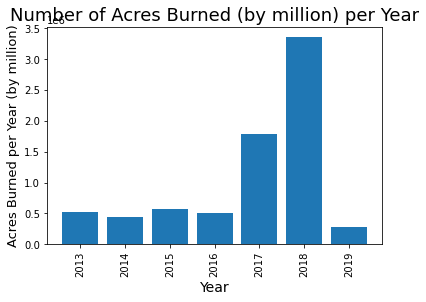

In [145]:
plt.bar(years_acres.index.values, years_acres.values)

plt.xlabel("Year", fontsize=14)
plt.ylabel("Acres Burned per Year (by million)", fontsize=13)
plt.title("Number of Acres Burned (by million) per Year", fontsize=18)

plt.xticks(rotation=90)
plt.tick_params(axis='x', which='major', labelsize=10)

plt.show()

In [146]:
years_major_acres = major.groupby(["ArchiveYear"]).sum()["AcresBurned"]
years_major_acres

ArchiveYear
2013     110085.0
2014     212816.0
2015     163696.0
2016     293926.0
2017    1218021.0
2018    2917483.0
2019     137584.0
Name: AcresBurned, dtype: float64

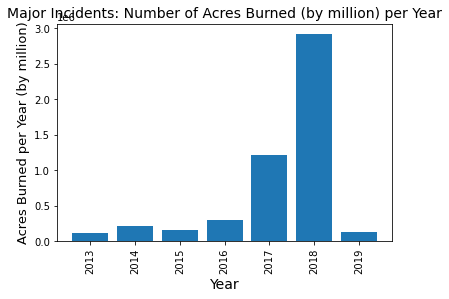

In [147]:
plt.bar(years_major_acres.index.values, years_major_acres.values)

plt.xlabel("Year", fontsize=14)
plt.ylabel("Acres Burned per Year (by million)", fontsize=13)
plt.title("Major Incidents: Number of Acres Burned (by million) per Year", fontsize=14)

plt.xticks(rotation=90)
plt.tick_params(axis='x', which='major', labelsize=10)

plt.show()

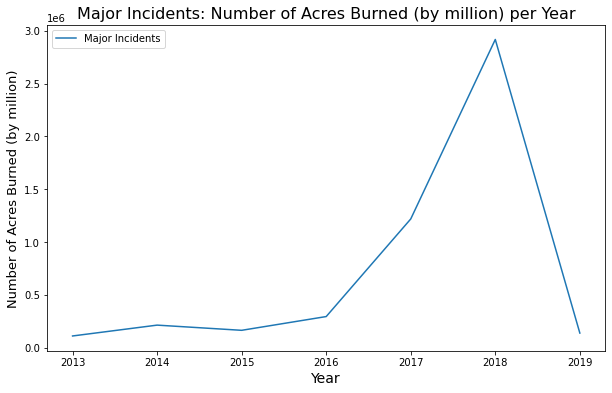

In [252]:
fig, ax=plt.subplots(figsize=(10,6))
ax.plot(years_major_acres.index.values, years_major_acres.values)

plt.xlabel("Year", fontsize=14)
plt.ylabel("Number of Acres Burned (by million)", fontsize=13)
plt.title("Major Incidents: Number of Acres Burned (by million) per Year", fontsize=16)


ax.legend(["Major Incidents"])
plt.show()

In [148]:
resources_crew_count = pyre_df.groupby(["ArchiveYear"]).count()["CrewsInvolved"]
resources_crew_count

ArchiveYear
2013    34
2014    23
2015    32
2016    18
2017    22
2018    19
2019    23
Name: CrewsInvolved, dtype: int64

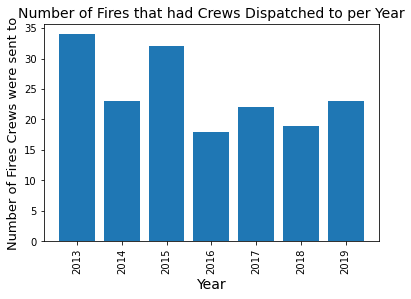

In [149]:
plt.bar(resources_crew_count.index.values, resources_crew_count.values)

plt.xlabel("Year", fontsize=14)
plt.ylabel("Number of Fires Crews were sent to", fontsize=13)
plt.title("Number of Fires that had Crews Dispatched to per Year", fontsize=14)

plt.xticks(rotation=90)
plt.tick_params(axis='x', which='major', labelsize=10)

plt.show()

In [150]:
resources_crew_sum = pyre_df.groupby(["ArchiveYear"]).sum()["CrewsInvolved"]
resources_crew_sum

ArchiveYear
2013    703.0
2014    244.0
2015    211.0
2016    127.0
2017    221.0
2018    283.0
2019    188.0
Name: CrewsInvolved, dtype: float64

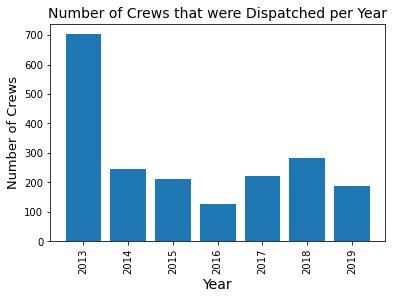

In [151]:
plt.bar(resources_crew_sum.index.values, resources_crew_sum.values)

plt.xlabel("Year", fontsize=14)
plt.ylabel("Number of Crews", fontsize=13)
plt.title("Number of Crews that were Dispatched per Year", fontsize=14)

plt.xticks(rotation=90)
plt.tick_params(axis='x', which='major', labelsize=10)

plt.show()

In [152]:
resources_crew_major_count = major.groupby(["ArchiveYear"]).count()["CrewsInvolved"]
resources_crew_major_count

ArchiveYear
2013    34
2014    23
2015    32
2016    18
2017    22
2018    19
2019    19
Name: CrewsInvolved, dtype: int64

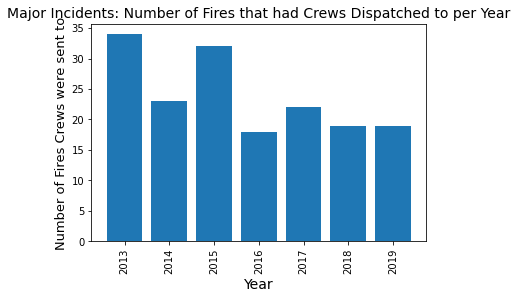

In [153]:
plt.bar(resources_crew_major_count.index.values, resources_crew_major_count.values)

plt.xlabel("Year", fontsize=14)
plt.ylabel("Number of Fires Crews were sent to", fontsize=13)
plt.title("Major Incidents: Number of Fires that had Crews Dispatched to per Year", fontsize=14)

plt.xticks(rotation=90)
plt.tick_params(axis='x', which='major', labelsize=10)

plt.show()

In [154]:
resources_crew_major_sum = major.groupby(["ArchiveYear"]).sum()["CrewsInvolved"]
resources_crew_major_sum

ArchiveYear
2013    703.0
2014    244.0
2015    211.0
2016    127.0
2017    221.0
2018    283.0
2019    162.0
Name: CrewsInvolved, dtype: float64

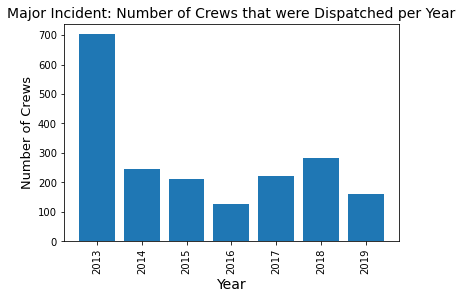

In [155]:
plt.bar(resources_crew_major_sum.index.values, resources_crew_major_sum.values)

plt.xlabel("Year", fontsize=14)
plt.ylabel("Number of Crews", fontsize=13)
plt.title("Major Incident: Number of Crews that were Dispatched per Year", fontsize=14)

plt.xticks(rotation=90)
plt.tick_params(axis='x', which='major', labelsize=10)

plt.show()

In [156]:
resources_personnel_count = pyre_df.groupby(["ArchiveYear"]).count()["PersonnelInvolved"]
resources_personnel_count

ArchiveYear
2013    35
2014    28
2015    37
2016    23
2017    27
2018    18
2019    36
Name: PersonnelInvolved, dtype: int64

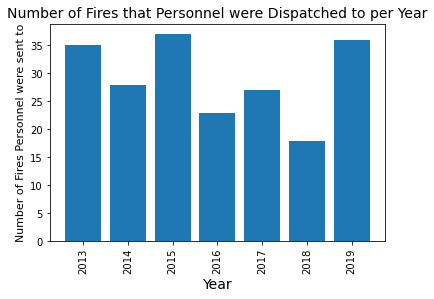

In [157]:
plt.bar(resources_personnel_count.index.values, resources_personnel_count.values)

plt.xlabel("Year", fontsize=14)
plt.ylabel("Number of Fires Personnel were sent to", fontsize=11)
plt.title("Number of Fires that Personnel were Dispatched to per Year", fontsize=14)

plt.xticks(rotation=90)
plt.tick_params(axis='x', which='major', labelsize=10)

plt.show()

In [158]:
resources_personnel_sum = pyre_df.groupby(["ArchiveYear"]).sum()["PersonnelInvolved"]
resources_personnel_sum

ArchiveYear
2013    20288.0
2014     5620.0
2015     6394.0
2016     4293.0
2017     8468.0
2018    13768.0
2019     8194.0
Name: PersonnelInvolved, dtype: float64

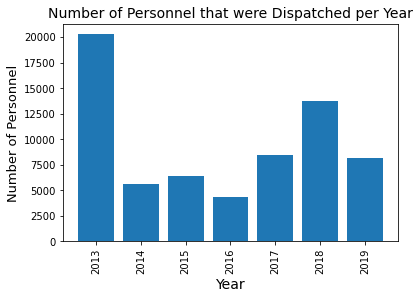

In [159]:
plt.bar(resources_personnel_sum.index.values, resources_personnel_sum.values)

plt.xlabel("Year", fontsize=14)
plt.ylabel("Number of Personnel", fontsize=13)
plt.title("Number of Personnel that were Dispatched per Year", fontsize=14)

plt.xticks(rotation=90)
plt.tick_params(axis='x', which='major', labelsize=10)

plt.show()

In [160]:
resources_personnel_major_count = major.groupby(["ArchiveYear"]).count()["PersonnelInvolved"]
resources_personnel_major_count

ArchiveYear
2013    35
2014    28
2015    37
2016    23
2017    27
2018    18
2019    23
Name: PersonnelInvolved, dtype: int64

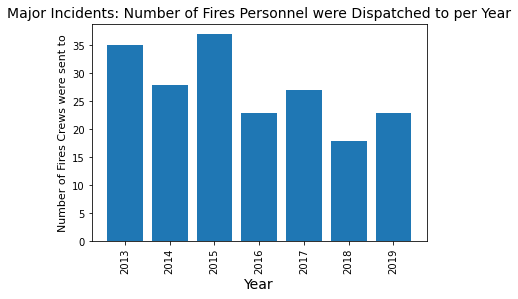

In [161]:
plt.bar(resources_personnel_major_count.index.values, resources_personnel_major_count.values)

plt.xlabel("Year", fontsize=14)
plt.ylabel("Number of Fires Crews were sent to", fontsize=11)
plt.title("Major Incidents: Number of Fires Personnel were Dispatched to per Year", fontsize=14)

plt.xticks(rotation=90)
plt.tick_params(axis='x', which='major', labelsize=10)

plt.show()

In [162]:
resources_personnel_major_sum = major.groupby(["ArchiveYear"]).sum()["PersonnelInvolved"]
resources_personnel_major_sum

ArchiveYear
2013    20288.0
2014     5620.0
2015     6394.0
2016     4293.0
2017     8468.0
2018    13768.0
2019     6151.0
Name: PersonnelInvolved, dtype: float64

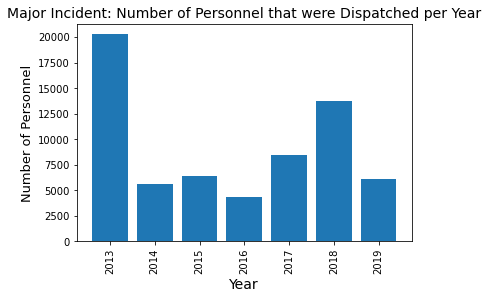

In [163]:
plt.bar(resources_personnel_major_sum.index.values, resources_personnel_major_sum.values)

plt.xlabel("Year", fontsize=14)
plt.ylabel("Number of Personnel", fontsize=13)
plt.title("Major Incident: Number of Personnel that were Dispatched per Year", fontsize=14)

plt.xticks(rotation=90)
plt.tick_params(axis='x', which='major', labelsize=10)

plt.show()

In [164]:
resources_dozers_count = pyre_df.groupby(["ArchiveYear"]).count()["Dozers"]
resources_dozers_count

ArchiveYear
2013    30
2014    10
2015    26
2016    13
2017    12
2018    15
2019    17
Name: Dozers, dtype: int64

In [165]:
resources_dozers_sum = pyre_df.groupby(["ArchiveYear"]).sum()["Dozers"]
resources_dozers_sum

ArchiveYear
2013    335.0
2014     21.0
2015     88.0
2016     33.0
2017     61.0
2018    345.0
2019     50.0
Name: Dozers, dtype: float64

In [166]:
resources_dozer_major_count = major.groupby(["ArchiveYear"]).count()["Dozers"]
resources_dozer_major_count

ArchiveYear
2013    30
2014    10
2015    26
2016    13
2017    12
2018    15
2019    13
Name: Dozers, dtype: int64

In [167]:
resources_dozer_major_sum = major.groupby(["ArchiveYear"]).sum()["Dozers"]
resources_dozer_major_sum

ArchiveYear
2013    335.0
2014     21.0
2015     88.0
2016     33.0
2017     61.0
2018    345.0
2019     46.0
Name: Dozers, dtype: float64

In [168]:
resources_engines_count = pyre_df.groupby(["ArchiveYear"]).count()["Engines"]
resources_engines_count

ArchiveYear
2013    37
2014    24
2015    38
2016    22
2017    23
2018    21
2019    26
Name: Engines, dtype: int64

In [169]:
resources_engines_sum = pyre_df.groupby(["ArchiveYear"]).sum()["Engines"]
resources_engines_sum

ArchiveYear
2013    1459.0
2014     230.0
2015     421.0
2016     262.0
2017     625.0
2018    1053.0
2019     451.0
Name: Engines, dtype: float64

In [170]:
resources_engines_major_count = major.groupby(["ArchiveYear"]).count()["Engines"]
resources_engines_major_count

ArchiveYear
2013    37
2014    24
2015    38
2016    22
2017    23
2018    21
2019    20
Name: Engines, dtype: int64

In [171]:
resources_engines_major_sum = major.groupby(["ArchiveYear"]).sum()["Engines"]
resources_engines_major_sum

ArchiveYear
2013    1459.0
2014     230.0
2015     421.0
2016     262.0
2017     625.0
2018    1053.0
2019     386.0
Name: Engines, dtype: float64

In [173]:
resources_watertenders_count = pyre_df.groupby(["ArchiveYear"]).count()["WaterTenders"]
resources_watertenders_count

ArchiveYear
2013    31
2014    15
2015    29
2016    15
2017    17
2018    18
2019    21
Name: WaterTenders, dtype: int64

In [195]:
resources_watertenders_sum = pyre_df.groupby(["ArchiveYear"]).sum()["WaterTenders"]
resources_watertenders_sum

ArchiveYear
2013    403.0
2014     53.0
2015    105.0
2016     68.0
2017     85.0
2018    348.0
2019     79.0
Name: WaterTenders, dtype: float64

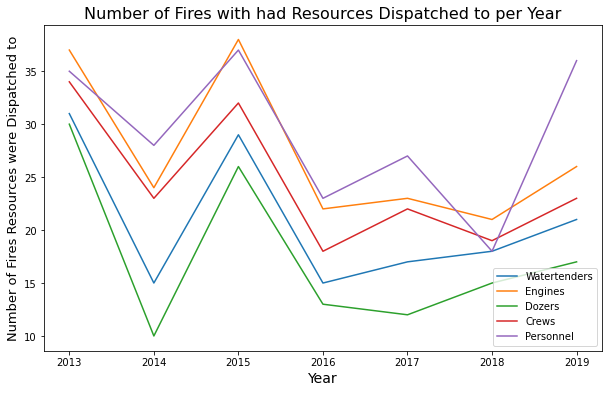

In [199]:
fig, ax=plt.subplots(figsize=(10,6))
ax.plot(resources_watertenders_count.index.values, resources_watertenders_count.values)
ax.plot(resources_engines_count.index.values, resources_engines_count.values)
ax.plot(resources_dozers_count.index.values, resources_dozers_count.values)
ax.plot(resources_crew_count.index.values, resources_crew_count.values)
ax.plot(resources_personnel_count.index.values, resources_personnel_count.values)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Number of Fires Resources were Dispatched to", fontsize=13)
plt.title("Number of Fires with had Resources Dispatched to per Year", fontsize=16)


ax.legend(["Watertenders", "Engines", "Dozers", "Crews", "Personnel"])
plt.show()

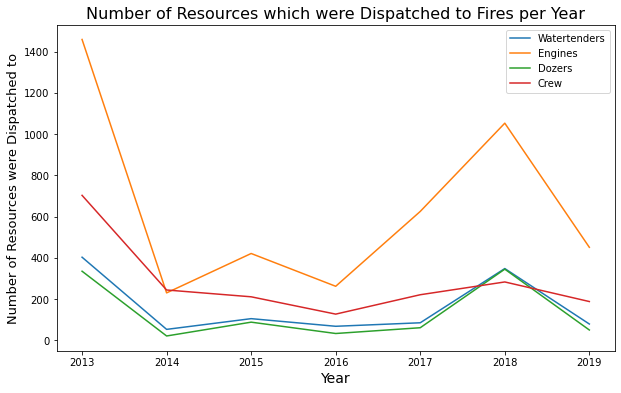

In [202]:
fig, ax=plt.subplots(figsize=(10,6))
ax.plot(resources_watertenders_sum.index.values, resources_watertenders_sum.values)
ax.plot(resources_engines_sum.index.values, resources_engines_sum.values)
ax.plot(resources_dozers_sum.index.values, resources_dozers_sum.values)
ax.plot(resources_crew_sum.index.values, resources_crew_sum.values)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Number of Resources were Dispatched to", fontsize=13)
plt.title("Number of Resources which were Dispatched to Fires per Year", fontsize=16)


ax.legend(["Watertenders", "Engines", "Dozers", "Crew"])
plt.show()

In [203]:
resources_watertenders_major_count = major.groupby(["ArchiveYear"]).count()["WaterTenders"]
resources_watertenders_major_count

ArchiveYear
2013    31
2014    15
2015    29
2016    15
2017    17
2018    18
2019    16
Name: WaterTenders, dtype: int64

In [175]:
resources_watertenders_major_sum = major.groupby(["ArchiveYear"]).sum()["WaterTenders"]
resources_watertenders_major_sum

ArchiveYear
2013    403.0
2014     53.0
2015    105.0
2016     68.0
2017     85.0
2018    348.0
2019     66.0
Name: WaterTenders, dtype: float64

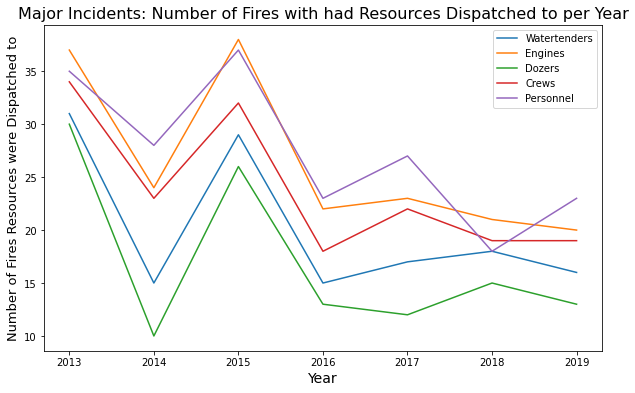

In [207]:
fig, ax=plt.subplots(figsize=(10,6))
ax.plot(resources_watertenders_major_count.index.values, resources_watertenders_major_count.values)
ax.plot(resources_engines_major_count.index.values, resources_engines_major_count.values)
ax.plot(resources_dozer_major_count.index.values, resources_dozer_major_count.values)
ax.plot(resources_crew_major_count.index.values, resources_crew_major_count.values)
ax.plot(resources_personnel_major_count.index.values, resources_personnel_major_count.values)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Number of Fires Resources were Dispatched to", fontsize=13)
plt.title("Major Incidents: Number of Fires with had Resources Dispatched to per Year", fontsize=16)


ax.legend(["Watertenders", "Engines", "Dozers", "Crews", "Personnel"])
plt.show()

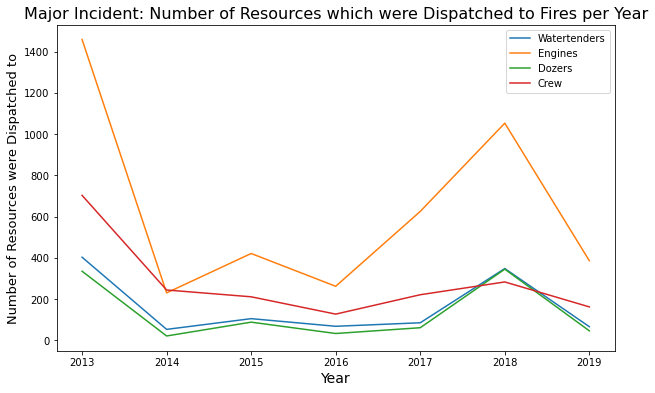

In [211]:
fig, ax=plt.subplots(figsize=(10,6))
ax.plot(resources_watertenders_major_sum.index.values, resources_watertenders_major_sum.values)
ax.plot(resources_engines_major_sum.index.values, resources_engines_major_sum.values)
ax.plot(resources_dozer_major_sum.index.values, resources_dozer_major_sum.values)
ax.plot(resources_crew_major_sum.index.values, resources_crew_major_sum.values)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Number of Resources were Dispatched to", fontsize=13)
plt.title("Major Incident: Number of Resources which were Dispatched to Fires per Year", fontsize=16)


ax.legend(["Watertenders", "Engines", "Dozers", "Crew"])
plt.show()

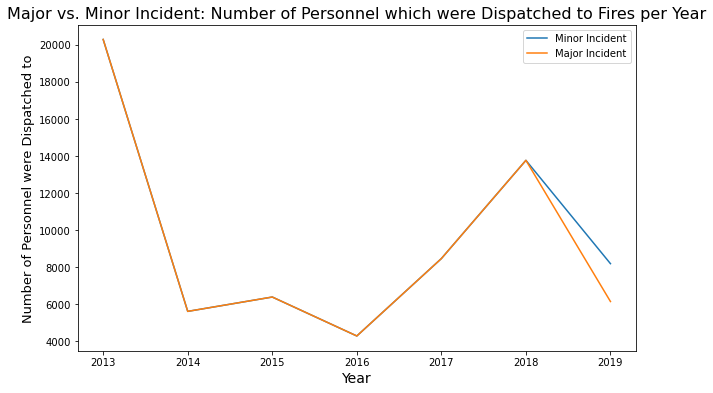

In [217]:
fig, ax=plt.subplots(figsize=(10,6))
ax.plot(resources_personnel_sum.index.values, resources_personnel_sum.values)
ax.plot(resources_personnel_major_sum.index.values, resources_personnel_major_sum.values)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Number of Personnel were Dispatched to", fontsize=13)
plt.title("Major vs. Minor Incident: Number of Personnel which were Dispatched to Fires per Year", fontsize=16)


ax.legend(["Minor Incident", "Major Incident"])
plt.show()

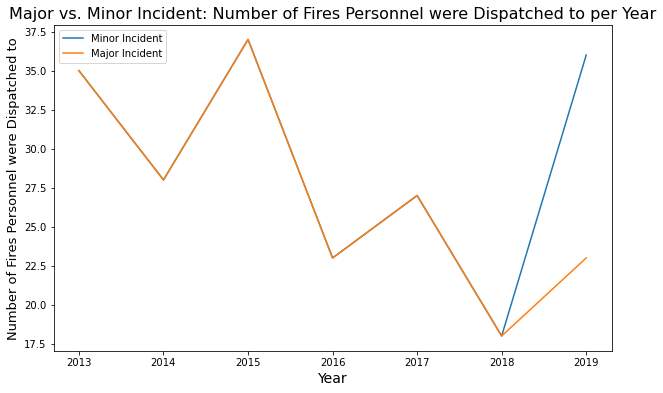

In [228]:
fig, ax=plt.subplots(figsize=(10,6))
ax.plot(resources_personnel_count.index.values, resources_personnel_count.values)
ax.plot(resources_personnel_major_count.index.values, resources_personnel_major_count.values)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Number of Fires Personnel were Dispatched to", fontsize=13)
plt.title("Major vs. Minor Incident: Number of Fires Personnel were Dispatched to per Year", fontsize=16)


ax.legend(["Minor Incident", "Major Incident"])
plt.show()

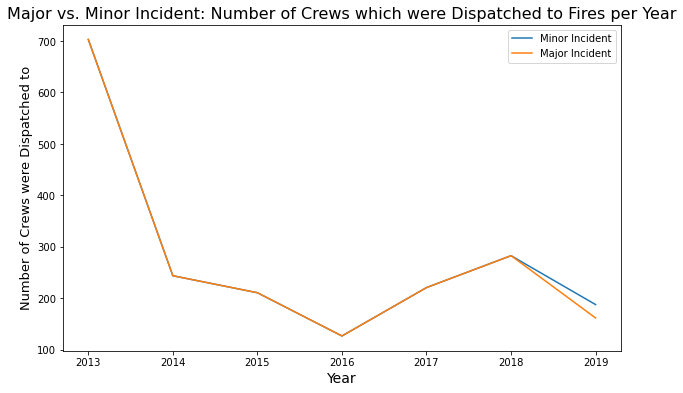

In [223]:
fig, ax=plt.subplots(figsize=(10,6))
ax.plot(resources_crew_sum.index.values, resources_crew_sum.values)
ax.plot(resources_crew_major_sum.index.values, resources_crew_major_sum.values)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Number of Crews were Dispatched to", fontsize=13)
plt.title("Major vs. Minor Incident: Number of Crews which were Dispatched to Fires per Year", fontsize=16)


ax.legend(["Minor Incident", "Major Incident"])
plt.show()

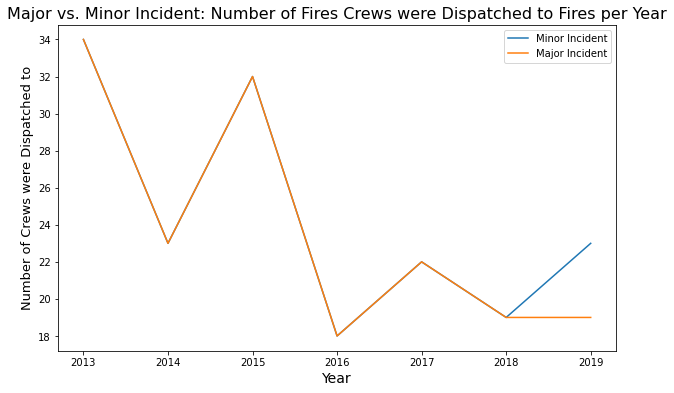

In [230]:
fig, ax=plt.subplots(figsize=(10,6))
ax.plot(resources_crew_count.index.values, resources_crew_count.values)
ax.plot(resources_crew_major_count.index.values, resources_crew_major_count.values)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Number of Crews were Dispatched to", fontsize=13)
plt.title("Major vs. Minor Incident: Number of Fires Crews were Dispatched to Fires per Year", fontsize=16)


ax.legend(["Minor Incident", "Major Incident"])
plt.show()

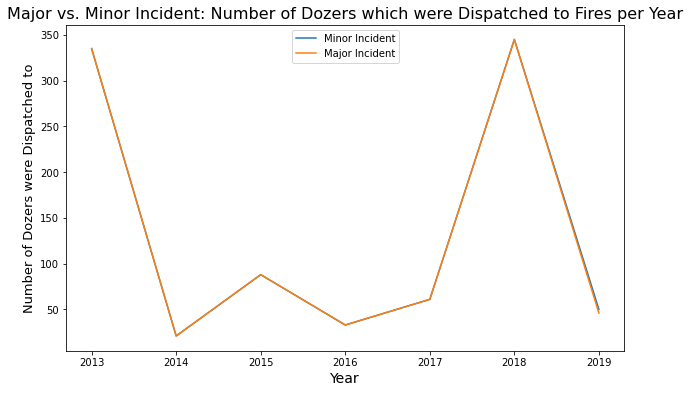

In [226]:
fig, ax=plt.subplots(figsize=(10,6))
ax.plot(resources_dozers_sum.index.values, resources_dozers_sum.values)
ax.plot(resources_dozer_major_sum.index.values, resources_dozer_major_sum.values)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Number of Dozers were Dispatched to", fontsize=13)
plt.title("Major vs. Minor Incident: Number of Dozers which were Dispatched to Fires per Year", fontsize=16)


ax.legend(["Minor Incident", "Major Incident"])
plt.show()

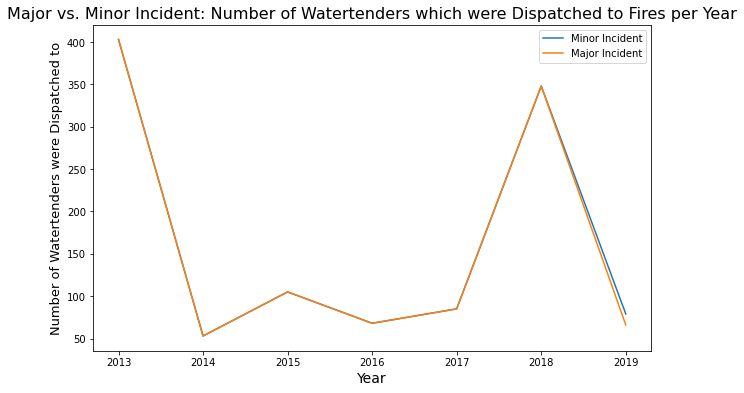

In [224]:
fig, ax=plt.subplots(figsize=(10,6))
ax.plot(resources_watertenders_sum.index.values, resources_watertenders_sum.values)
ax.plot(resources_watertenders_major_sum.index.values, resources_watertenders_major_sum.values)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Number of Watertenders were Dispatched to", fontsize=13)
plt.title("Major vs. Minor Incident: Number of Watertenders which were Dispatched to Fires per Year", fontsize=16)


ax.legend(["Minor Incident", "Major Incident"])
plt.show()

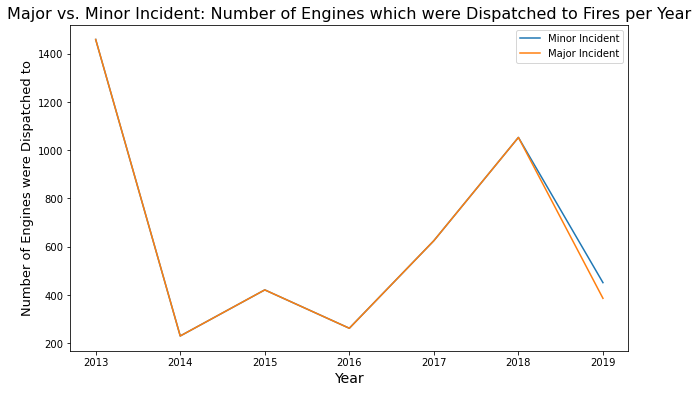

In [225]:
fig, ax=plt.subplots(figsize=(10,6))
ax.plot(resources_engines_sum.index.values, resources_engines_sum.values)
ax.plot(resources_engines_major_sum.index.values, resources_engines_major_sum.values)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Number of Engines were Dispatched to", fontsize=13)
plt.title("Major vs. Minor Incident: Number of Engines which were Dispatched to Fires per Year", fontsize=16)


ax.legend(["Minor Incident", "Major Incident"])
plt.show()

In [176]:
major_counties = major["Counties"].value_counts()
major_counties

Butte              28
San Diego          27
Shasta             26
Lake               21
Riverside          18
Napa               16
El Dorado          15
Mariposa           14
Fresno             12
San Bernardino     11
Madera             11
San Luis Obispo    11
Sonoma             11
Tehama             11
Calaveras          10
Mendocino          10
Siskiyou            9
Amador              8
Inyo                7
Ventura             7
Tuolumne            6
Solano              6
Los Angeles         6
Monterey            6
Colusa              6
Humboldt            6
Tulare              5
Nevada              5
Yolo                5
Santa Barbara       5
San Benito          4
Trinity             4
Placer              4
Kern                4
Lassen              3
Glenn               3
Contra Costa        3
Modoc               3
Yuba                3
Santa Clara         2
Alameda             2
Santa Cruz          2
Sacramento          1
Marin               1
Kings               1
Orange    

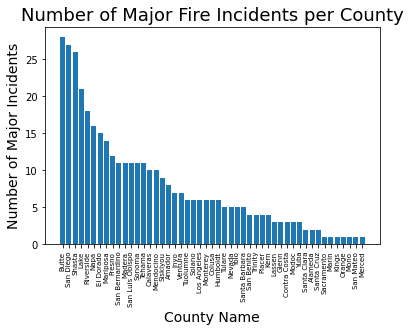

In [177]:
plt.bar(major_counties.index.values, major_counties.values)

plt.xlabel("County Name", fontsize=14)
plt.ylabel("Number of Major Incidents", fontsize=14)
plt.title("Number of Major Fire Incidents per County", fontsize=18)

plt.xticks(rotation=90)
plt.tick_params(axis='x', which='major', labelsize=7)

plt.show()

In [178]:
major_county_df = pd.DataFrame(major_counties)
major_county_df
major_county_10 = major_county_df.head(10)
major_county_10

,Counties
Butte,28
San Diego,27
Shasta,26
Lake,21
Riverside,18
Napa,16
El Dorado,15
Mariposa,14
Fresno,12
San Bernardino,11


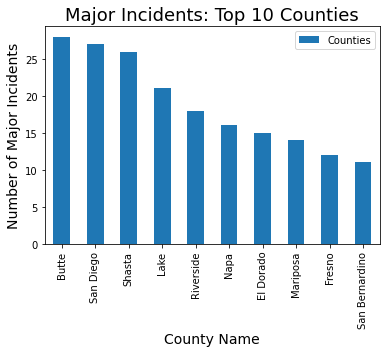

In [179]:
major_county_10.plot(kind="bar")

plt.xlabel("County Name", fontsize=14)
plt.ylabel("Number of Major Incidents", fontsize=14)
plt.title("Major Incidents: Top 10 Counties", fontsize=18)

plt.show()

In [180]:
inc_2019 = pyre_df.loc[pyre_df["ArchiveYear"]==2019]
inc_2019.head()

,AcresBurned,AirTankers,ArchiveYear,Counties,CountyIds,CrewsInvolved,Dozers,Engines,Extinguished,Days Burned,...,Location,MajorIncident,PersonnelInvolved,Started,StructuresDamaged,StructuresDestroyed,StructuresEvacuated,StructuresThreatened,UniqueId,WaterTenders
Name,,,,,,,,,,,,,,,,,,,,,
Easy Fire,1806.0,NaN,2019,Ventura,56,NaN,NaN,NaN,11/2/19,3,...,"West Easy Street and West Los Angeles Avenue, ...",False,NaN,10/30/19,NaN,NaN,NaN,NaN,00e6d6d5-f168-45fa-817a-f7758a5170b7,NaN
Gaines Fire,1300.0,NaN,2019,Mariposa,22,NaN,NaN,NaN,NaN,-43693,...,"Mt Gaines Rd and Bear Valley Rd, Bear Valley",False,NaN,8/16/19,NaN,NaN,NaN,NaN,547b7d19-9b75-4c11-8b88-56adb6460a3c,NaN
Sandalwood Fire,1011.0,NaN,2019,Riverside,33,10.0,NaN,17.0,NaN,-43748,...,Calimesa Boulevard and Sandalwood Drive,True,247.0,10/10/19,16.0,74.0,NaN,NaN,7ff84b11-c3fb-4f5c-8a00-07243d4a4e33,1.0
Rawson Fire,605.0,NaN,2019,Tehama,52,NaN,NaN,NaN,10/28/19,1,...,"Gyle Road and Long Dirt Road, Northwest of Cor...",False,NaN,10/27/19,NaN,NaN,NaN,NaN,828b2492-fc44-4fc0-97fa-f0b439e6fa0d,NaN
Hill Fire,494.0,NaN,2019,Riverside,33,5.0,2.0,14.0,11/2/19,3,...,"Granite Hill and Pyrite Street, in Jurupa Valley",True,126.0,10/30/19,NaN,NaN,NaN,NaN,8f23653c-1a4c-4609-bfb3-72b1665eab69,1.0


In [181]:
major_minor_inc_2019 = inc_2019.groupby(["ArchiveYear", "MajorIncident", "Name"]).count()["CrewsInvolved"]
major_minor_inc_2019 = major_minor_inc_2019.reset_index()
crews_minor = major_minor_inc_2019.loc[(major_minor_inc_2019["CrewsInvolved"]>=1)&(major_minor_inc_2019["MajorIncident"]==False)]
crews_minor

,ArchiveYear,MajorIncident,Name,CrewsInvolved
5,2019,False,American Fire,1
45,2019,False,Creek Fire,1
99,2019,False,Kennedy Fire,1
139,2019,False,Oak Fire,1


In [182]:
major_minor_inc_2019 = inc_2019.groupby(["ArchiveYear", "MajorIncident","Name"]).count()["Dozers"]
major_minor_inc_2019 = major_minor_inc_2019.reset_index()
dozers_minor = major_minor_inc_2019.loc[(major_minor_inc_2019["Dozers"]>=1)&(major_minor_inc_2019["MajorIncident"]==False)]
dozers_minor

,ArchiveYear,MajorIncident,Name,Dozers
5,2019,False,American Fire,1
45,2019,False,Creek Fire,1
66,2019,False,Forbestown Fire,1
99,2019,False,Kennedy Fire,1


In [183]:
minor_all = pd.concat([dozers_minor, crews_minor, engines_minor, waterTenders_minor])
minor_all.fillna(0)

,ArchiveYear,MajorIncident,Name,Dozers,CrewsInvolved,Engines,WaterTenders
5,2019,False,American Fire,1.0,0.0,0.0,0.0
45,2019,False,Creek Fire,1.0,0.0,0.0,0.0
66,2019,False,Forbestown Fire,1.0,0.0,0.0,0.0
99,2019,False,Kennedy Fire,1.0,0.0,0.0,0.0
5,2019,False,American Fire,0.0,1.0,0.0,0.0
45,2019,False,Creek Fire,0.0,1.0,0.0,0.0
99,2019,False,Kennedy Fire,0.0,1.0,0.0,0.0
139,2019,False,Oak Fire,0.0,1.0,0.0,0.0
5,2019,False,American Fire,0.0,0.0,1.0,0.0
45,2019,False,Creek Fire,0.0,0.0,1.0,0.0


In [184]:
major_minor_inc_2019 = inc_2019.groupby(["ArchiveYear", "MajorIncident", "Name"]).count()["Engines"]
major_minor_inc_2019 = major_minor_inc_2019.reset_index()
engines_minor = major_minor_inc_2019.loc[(major_minor_inc_2019["Engines"]>=1)&(major_minor_inc_2019["MajorIncident"]==False)]
engines_minor

,ArchiveYear,MajorIncident,Name,Engines
5,2019,False,American Fire,1
45,2019,False,Creek Fire,1
66,2019,False,Forbestown Fire,1
99,2019,False,Kennedy Fire,1
139,2019,False,Oak Fire,1
146,2019,False,Patterson Fire,1


In [185]:
major_minor_inc_2019 = inc_2019.groupby(["ArchiveYear", "MajorIncident","Name"]).count()["PersonnelInvolved"]
major_minor_inc_2019 = major_minor_inc_2019.reset_index()
major_minor_inc_2019.loc[(major_minor_inc_2019["PersonnelInvolved"]>=1)&(major_minor_inc_2019["MajorIncident"]==False)]

,ArchiveYear,MajorIncident,Name,PersonnelInvolved
5,2019,False,American Fire,1
11,2019,False,Bautista Fire,1
25,2019,False,Broder Fire,1
45,2019,False,Creek Fire,1
66,2019,False,Forbestown Fire,1
99,2019,False,Kennedy Fire,1
104,2019,False,Lime Fire,1
107,2019,False,Lone Fire,1
139,2019,False,Oak Fire,1
146,2019,False,Patterson Fire,1


In [186]:
major_minor_inc_2019 = inc_2019.groupby(["ArchiveYear", "MajorIncident", "Name"]).count()["WaterTenders"]
major_minor_inc_2019 = major_minor_inc_2019.reset_index()
waterTenders_minor = major_minor_inc_2019.loc[(major_minor_inc_2019["WaterTenders"]>=1)&(major_minor_inc_2019["MajorIncident"]==False)]
waterTenders_minor

,ArchiveYear,MajorIncident,Name,WaterTenders
5,2019,False,American Fire,1
45,2019,False,Creek Fire,1
66,2019,False,Forbestown Fire,1
99,2019,False,Kennedy Fire,1
139,2019,False,Oak Fire,1


In [187]:
minor_2019 = inc_2019.loc[inc_2019["MajorIncident"]==False]
minor_2019

,AcresBurned,AirTankers,ArchiveYear,Counties,CountyIds,CrewsInvolved,Dozers,Engines,Extinguished,Days Burned,...,Location,MajorIncident,PersonnelInvolved,Started,StructuresDamaged,StructuresDestroyed,StructuresEvacuated,StructuresThreatened,UniqueId,WaterTenders
Name,,,,,,,,,,,,,,,,,,,,,
Easy Fire,1806.0,NaN,2019,Ventura,56,NaN,NaN,NaN,11/2/19,3,...,"West Easy Street and West Los Angeles Avenue, ...",False,NaN,10/30/19,NaN,NaN,NaN,NaN,00e6d6d5-f168-45fa-817a-f7758a5170b7,NaN
Gaines Fire,1300.0,NaN,2019,Mariposa,22,NaN,NaN,NaN,NaN,-43693,...,"Mt Gaines Rd and Bear Valley Rd, Bear Valley",False,NaN,8/16/19,NaN,NaN,NaN,NaN,547b7d19-9b75-4c11-8b88-56adb6460a3c,NaN
Rawson Fire,605.0,NaN,2019,Tehama,52,NaN,NaN,NaN,10/28/19,1,...,"Gyle Road and Long Dirt Road, Northwest of Cor...",False,NaN,10/27/19,NaN,NaN,NaN,NaN,828b2492-fc44-4fc0-97fa-f0b439e6fa0d,NaN
Foothills Fire,355.0,NaN,2019,Placer,31,NaN,NaN,NaN,NaN,-43794,...,"Foothills and McAnally Drive, northwest of Ros...",False,NaN,11/25/19,NaN,NaN,NaN,NaN,77d64e4c-a50f-4f4d-a750-e6a6f0ddadc9,NaN
Cross Fire,289.0,NaN,2019,Monterey,27;40,NaN,NaN,NaN,10/11/19,2,...,Indian Valley Road and Monterey County Line ne...,False,NaN,10/9/19,NaN,NaN,NaN,NaN,207f72f7-1453-40dc-919e-3551f7041b22,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Eagle Fire,9.0,NaN,2019,Riverside,33,NaN,NaN,NaN,10/10/19,0,...,"Eagle Canyon Rd. and Cajalco Rd., southwest of...",False,NaN,10/10/19,NaN,NaN,NaN,NaN,6e93b252-99a3-4214-9921-238373b17535,NaN
Long Fire,2.0,NaN,2019,Nevada,29,NaN,NaN,NaN,6/28/19,0,...,"Off of Long Point Road and Old Mill Road, Sou...",False,NaN,6/28/19,NaN,NaN,NaN,NaN,b38c0563-b321-431b-9174-6336c5a0d449,NaN
Cashe Fire,NaN,NaN,2019,Yolo,57,NaN,NaN,NaN,NaN,-43794,...,"County Road 102 and County Road 17, North of W...",False,NaN,11/25/19,NaN,NaN,NaN,NaN,9c26f915-1b33-422d-b30a-9eb4da6fd729,NaN


In [188]:
major_inc_2019 = major.loc[major["ArchiveYear"]==2019]
major_inc_2019

,AcresBurned,AirTankers,ArchiveYear,Counties,CountyIds,CrewsInvolved,Dozers,Engines,Extinguished,Days Burned,...,Location,MajorIncident,PersonnelInvolved,Started,StructuresDamaged,StructuresDestroyed,StructuresEvacuated,StructuresThreatened,UniqueId,WaterTenders
Name,,,,,,,,,,,,,,,,,,,,,
Sandalwood Fire,1011.0,NaN,2019,Riverside,33,10.0,NaN,17.0,NaN,-43748,...,Calimesa Boulevard and Sandalwood Drive,True,247.0,10/10/19,16.0,74.0,NaN,NaN,7ff84b11-c3fb-4f5c-8a00-07243d4a4e33,1.0
Hill Fire,494.0,NaN,2019,Riverside,33,5.0,2.0,14.0,11/2/19,3,...,"Granite Hill and Pyrite Street, in Jurupa Valley",True,126.0,10/30/19,NaN,NaN,NaN,NaN,8f23653c-1a4c-4609-bfb3-72b1665eab69,1.0
Miller Fire,37.0,2.0,2019,San Diego,37,4.0,2.0,10.0,10/27/19,2,...,"Miller Lane and Cole Grade Lane, North of Vall...",True,100.0,10/25/19,1.0,3.0,NaN,NaN,7ff229e4-be94-4319-8916-19eb43753843,2.0
Vista Fire,25.0,NaN,2019,San Diego,37,NaN,NaN,NaN,7/18/19,1,...,Off Vista De La Montana in the Dehesa area,True,NaN,7/17/19,NaN,NaN,NaN,NaN,06fa2750-afea-4f88-b1c4-48b9bc21f4eb,NaN
Kincade Fire,77758.0,NaN,2019,Sonoma,49,2.0,0.0,5.0,11/6/19,14,...,"John Kincade Road and Burned Mountain Road, no...",True,55.0,10/23/19,60.0,374.0,NaN,0.0,809d101c-8aa3-4a53-bf20-f38ae7ec7941,2.0
Taboose Fire,10296.0,NaN,2019,Inyo,14,8.0,1.0,8.0,11/21/19,76,...,south west of Big Pine and north west of Aberdeen,True,269.0,9/6/19,NaN,NaN,NaN,NaN,e7ea56c5-4290-4406-b0a5-c9d1718e9700,4.0
Maria Fire,9999.0,NaN,2019,Ventura,56,17.0,NaN,45.0,11/6/19,6,...,"off of Bradley Road and Solano Verde Dr, Top o...",True,626.0,10/31/19,NaN,4.0,NaN,NaN,31852a71-e639-496f-9e7d-0968d1c218b3,3.0
Red Bank Fire,8838.0,3.0,2019,Tehama,52,53.0,27.0,98.0,9/13/19,8,...,"Off Hammer Loop Road and Petty John Road, West...",True,1936.0,9/5/19,NaN,2.0,NaN,NaN,14ad161c-bfc6-41ae-af84-a464084a4142,23.0
Saddle Ridge Fire,8799.0,NaN,2019,Los Angeles,19,NaN,NaN,NaN,10/31/19,21,...,"Saddle Ridge Rd, Sylmar",True,206.0,10/10/19,88.0,19.0,NaN,NaN,c52717d6-0297-4c5b-a0f1-f17abcd7ac27,NaN
